<center><h1>7CCSMQMF Coursework Assignment #1</h1></center>

<h2>Imports</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

<h2>Task 1: CDF Function</h2>
<p>A CDF() function which takes a single standardised normal random variable (x) as an argument and computes the cumulative distribution function of (x) is created. This function is then tested over the required interval, $x \in (-4,4)$, with a plot of these results being presented. SciPy's norm.cdf() function is then tested and plotted over the same interval. Both results are plotted on the same graph, with a discussion of the accuracy (along with code to more objectively test this) being provided.</p>

<p>For encapsulation's sake and ease of debugging, the code and graph for our CDF() and then the code and graph for SciPy's norm.cdf(), in addition to the comparison graph, are provided in separate cells.</p>

<p>The equation for the polynomial based numerical scheme used in the CDF() function is given below:</p>
<blockquote>\begin{equation}
  N(x)=\left\{
  \begin{array}{@{}ll@{}}
    1 - n(x)(a_1k + a_2k^2 + a_3k^3 + a_4k^4 + a_5k^5), & x\geq0 \\
    1 - N(-x), & x < 0
  \end{array}\right.
\end{equation}</blockquote>

In [2]:
def CDF(x: float) -> float:
    """
    Takes a single floating point value, x, and computes an approximation for the cumulative
    distribution function of this value using a polynomial based numerical scheme. This numerical
    scheme is outlined in the task description above.
    
    Args:
        float x: This is a standardised normal random variable representing the observed value
                 which we are computing the CDF for. (N(x) = p(X < x)).
    
    Returns:
        (float) CDF(x): Returns a floating point value representing the numerical approximation
                        found for the CDF of x.
    """
    # The constant coefficients used in the numerical approximation scheme
    A1 = 0.319381530
    A2 = -0.356563782
    A3 = 1.781477937
    A4 = -1.821255978
    A5 = 1.330274429
    
    # The variables in the numerical approximation scheme
    K = 1 / (1 + 0.2316419 * x)
    n_x = 1 / np.sqrt(2 * np.pi) * np.exp(-(x**2/2))
    
    # Calcualtes and returns the correct floating point value of x
    if x >= 0:
        return 1 - n_x*((A1 * K) + (A2 * K**2) + (A3 * K**3) + (A4 * K**4) + (A5 * K**5))
    elif x < 0:
        # Recursively calls the CDF() function again if the value of x is negative
        return 1 - CDF(-x)

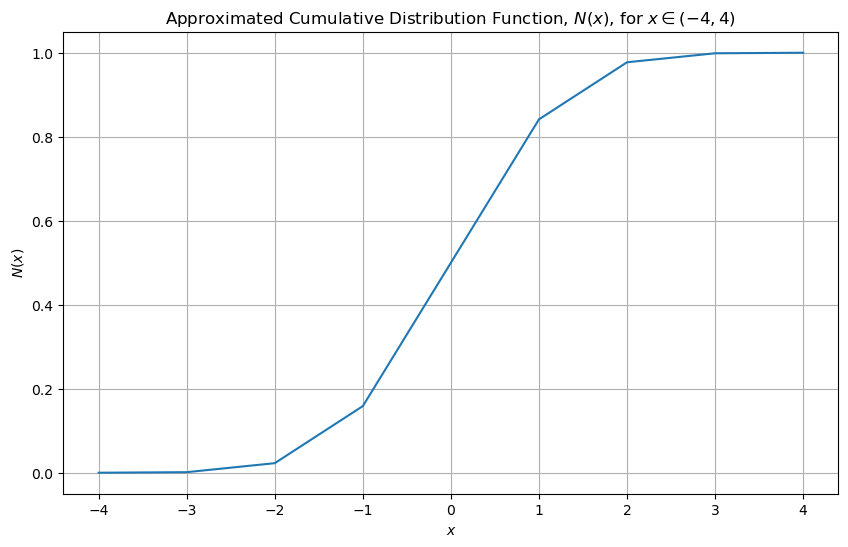

In [3]:
"""
Calculates the values for our CDF() and SciPy's norm.cdf() and plots the results
for our CDF() (done over the required interval).
"""
# Stores the array of y values (N(x)) calculated using our CDF() function
vertical_axis = np.array([0.0] * 9)
# Stores the array of y values (N(x)) calculated using SciPys built in norm.cdf() function
scipy_vertical_axis = np.array([0.0] * 9)
# Stores the range of x values (-4, 4)
# The interval provided to np.arange is exclusive of the final value (need to go to upper bound + 1)
horizontal_axis = np.arange(-4, 5, 1)

# Calculates and stores the CDF using the corresponding function and array from x = -4 to x = 4
# Python loops are exclusive of the final value (so you need to loop to upper bound + 1)
index = 0
for x in range(-4, 5):
    vertical_axis[index] = CDF(x)
    scipy_vertical_axis[index] = norm.cdf(x)
    index += 1

# Plots our N(x) on the vertical axis and x = (-4, 4) on the horizontal axis
plt.figure(figsize=(10,6))
plt.plot(horizontal_axis, vertical_axis)
plt.xlabel('$x$')
plt.ylabel('$N(x)$')
plt.title('Approximated Cumulative Distribution Function, $N(x)$, for $x \in (-4, 4)$')
plt.grid(True)
plt.show()

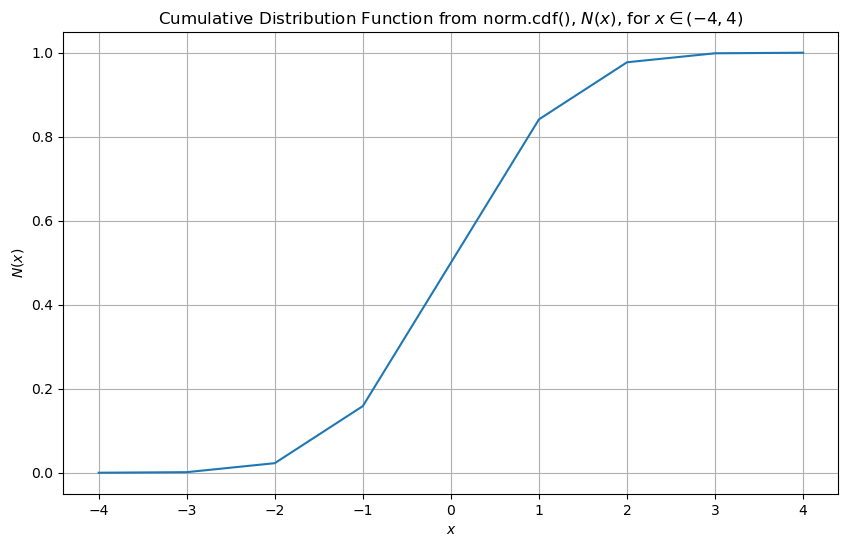

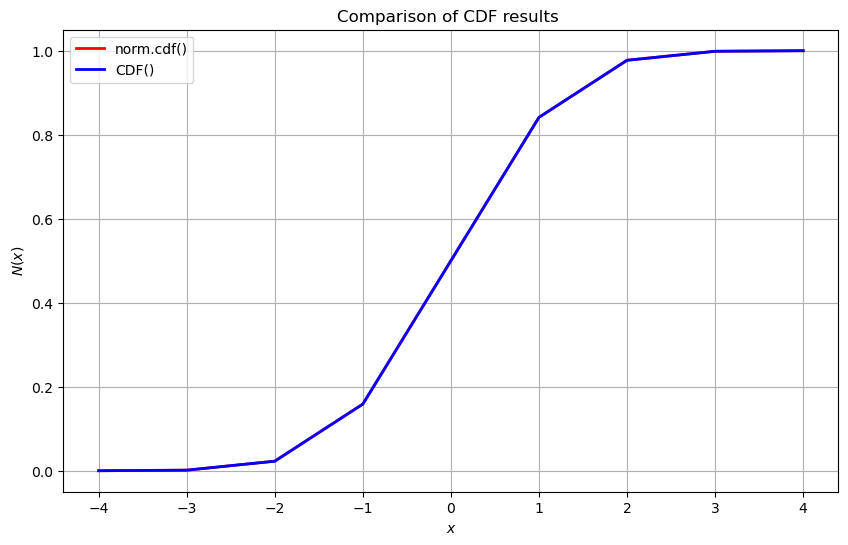

In [4]:
"""
Plots the results for SciPy's norm.cdf() and plots both of the found results on the same plot.
"""
# Plots SciPy's N(x) on the vertical axis and x = (-4, 4) on the horizontal axis
plt.figure(figsize=(10,6))
plt.plot(horizontal_axis, scipy_vertical_axis)
plt.xlabel('$x$')
plt.ylabel('$N(x)$')
plt.title('Cumulative Distribution Function from norm.cdf(), $N(x)$, for $x \in (-4, 4)$')
plt.grid(True)
plt.show()

# To aid in the comparison of the two methods, both graphs are overlayed onto the same plot
plt.figure(figsize=(10,6))
# Plots our CDF results in blue
plt.plot(horizontal_axis, scipy_vertical_axis, 'r-', label='norm.cdf()', linewidth=2)
plt.plot(horizontal_axis, vertical_axis, 'b-', label='CDF()', linewidth=2)
# Plots the SciPy norm.cdf() CDF results in red
plt.xlabel('$x$')
plt.ylabel('$N(x)$')
plt.title('Comparison of CDF results ')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
"""
Finds the mean squared error and root mean squared error between both sets of results.
"""
# Stores the sum of the squared error between each value found by norm.cdf() and CDF()
sum_square_error = 0

# Loops over the found CDF values to calculate a moving sum of the squared error
for i in range(0, len(vertical_axis)):
    sum_square_error += (scipy_vertical_axis[i] - vertical_axis[i])**2

# Outputs the MSE and RMSE results
print("The mean squared error (MSE) between SciPy's norm.cdf() method and our CDF() method is:", 
      (1/len(vertical_axis)) * sum_square_error)

print("The root mean squared error (RMSE) between SciPy's norm.cdf() method and our CDF() method is:", 
      np.sqrt((1/len(vertical_axis)) * sum_square_error))

The mean squared error (MSE) between SciPy's norm.cdf() method and our CDF() method is: 2.206394041935958e-15
The root mean squared error (RMSE) between SciPy's norm.cdf() method and our CDF() method is: 4.697226886084978e-08


<h2>Task 1 Continued: Comparison of our CDF() and SciPy's norm.cdf()</h2>
<p>The most straightforward way to assess the accuracy of our CDF() method when compared to SciPy's norm.cdf() method is to find the deviation between the results for $N(x)$ for each $x$ value. To this extent, two methods were used to assess the accuracy:</p> 
<ol>
<li>A plot overlaying the results attained by our CDF() and SciPy's norm.cdf() was constructed to provide a visual aid for the comparison. It can clearly be seen from the graph that both plots are near identical, with only marginal deviations between the two. Note, the linewidth for this plot was doubled to more clearly elucidate the results of the plot.</li>
<li>The Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) between SciPy's norm.cdf() and our CDF() was calculated to find a more exact measure of the distance/ error between our CDF() and norm.cdf(). The MSE sums the square of the difference between each found value and then divides the final sum by the number of elements (the RMSE carries out the same process but additionally computes the square root of the MSE). The results for the MSE and RMSE are of order O$(e^{-15})$ and O$(e^{-8})$ respectively; these numbers are so small that it is fair to say that both methods are again near identical, and with regards to any calculations done throughout the rest of this coursework, will produce the same end results.</li>
</ol>

<h3>Conclusion:</h3>
<p>Taking both results attained above and using the norm.cdf() values as a perfectly accurate benchmark, it can  be concluded that the CDF() function produced in this task is extremely accurate (99.99...% accurate), deviating only marginally from the norm.cdf() values produced by Python's built-in norm.cdf() function.</p>
<p>Additionally, more exhaustive or statistically extensive methods such as Hypothesis testing, QQ plots (determines if two data samples come from the same population) and/or a Kolmogorov-Smirnov test (finds the distance between an empirical distribution function and a given reference distribution function), would have been overkill and would have led to a similar conclusion (as the two data sets are so similar, there is little room for doubt).</p>

<h2>Task 2: Option Pricing Using our CDF Function</h2>
<p>The Black-Scholes formulae given in Lecture 5, to find the value of a European call option given a continuous dividend yield on the underlying is: <blockquote>$C(S, t) = Se^{-D(T-t)}N(d_1) - Ee^{-r(T-t)}N(d_2)$ </blockquote></p>
<p>Using put-call parity, the value of a European put option given a continuous dividend yield on the underlying is given by: <blockquote>$P(S, t) = -Se^{-D(T-t)}N(-d_1) + Ee^{-r(T-t)}N(-d_2)$</blockquote></p>
<p>The Black-Scholes formulae to find the value of a Binary call option given a continuous dividend yield on the underlying is: <blockquote>$C_B(S, t) = e^{-r(T-t)}N(d_2)$</blockquote></p>
<p>Using put-call parity, the value of the Binary put option given a continuous dividend yield on the underlying is given by: <blockquote>$P_B(S, t) = e^{-r(T-t)}(1 - N(d_2))$</blockquote></p>
<p>The price of the binary call and put options can be validated fairly easily as together, they must sum to the present value of \$1 received at time T. </p>
<blockquote>$C_B + P_B = e^{-r(T-t)} \times 1$</blockquote>
<p>All aforementioned BSM equations use the same $d_1$ and $d_2$, which are given by:</p>
<blockquote>$d_1 = \frac{log(\frac{S}{E}) + (r - D + \frac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T - t}}$</blockquote>
<blockquote>$d_2 = \frac{log(\frac{S}{E}) + (r - D - \frac{1}{2}\sigma^2)(T-t)}{\sigma \sqrt{T - t}}$</blockquote>
<p>All aforementioned BSM equations use the same $N(d_i), i \in (1,2)$, which represents the cumulative distribution function for a normal distribution (what was found in Task 1).</p>

<h3>Task Description:</h3>
<p>For sake of encapsulation and readability, a function was created for each of the four types of options this tasks seeks to price. These functions are then tested in a separate cell, which allows the user to enter any variation of the input parameters (granted they are of valid type and length) and then outputs the corresponding option price for each of the four option types - the example provided in the course work specification is the same as the one used here.</p>
<p>This task then has a separate section which focuses on the experimentation of each parameter used in the BSM equations, with code for varying (all parameters are varied individually with respect to the other parameters, whose values are set to those seen in the example provided in the specification) the parameter values and plotting the resulting option price for both vanilla calls and puts.</p>
<p>A discussion of the results and a table outlining the surface level effect of each parameter is provided.</p>

In [6]:
# For these function declarations, BSM stands for Black-Scholes-Merton
def BSM_European_Call(S: float, E: float, t: float, T: float, r: float,
                      D: float, d1: float, d2: float) -> float:
    """
    Finds the price of a European call option using the relevant Black-Scholes formula.
    
    Args:
        float S: The current stock price of the underlying asset, given as a floating
                point value, to allow for cent values (i.e. $x.12).

        float E: The strike price of the options contract, given as a floating point value,
                 to allow for cent values (i.e. $x.12).

        float t: The current time (in years), usually 0, but is given as a floating point
                 value to allow for values that are a fraction of a year to be given.

        float T: The time to expiry (in years) of the contract, given as a floating point
                 value to allow for values that are fractions of years to be given.

        float r: The risk free interest rate (as a percentage), given as a floating point
                 value to allow fractional percentages to be entered.
        
        float D: The constant and continuous dividend yield (as a percentage), given as a
                 floating point value for the same reasons as above.
        
        float d1: The first value which is used when calculating the CDF, this is a floating
                  point value as the result of a prior calculation.
        
        float d2: The second value which is used for calculating the CDF in each equation,
                  with the same justification as above.
    
    Returns:
        float : A floating point value representing the price of a European call option
                given the provided input parameters.
    """
    return (S * np.exp(-D * (T - t)) * CDF(d1)) - (E * np.exp(-r * (T - t)) * CDF(d2))

def BSM_European_Put(S: float, E: float, t: float, T: float, r: float,
                     D: float, d1: float, d2:float) -> float:
    """
    Finds the price of a European put option using the relevant Black-Scholes formula.
    
    Args:
        All arguments for this function are identical to those outlined in the BSM_European_Call()
        function. Explanations and justifications for these arguments can be found in the
        corresponding docstring.

    Returns:
        float : A floating point value representing the price of a European put option
                given the provided input parameters.
    """
    return (-S * np.exp(-D * (T - t)) * CDF(-d1)) + (E * np.exp(-r * (T - t)) * CDF(-d2))
    
def BSM_Binary_Call(r: float, t: float, T: float, d2: float) -> float:
    """
    Finds the price of a Binary call option using the relevant Black-Scholes formula.
    
    Args:
        All arguments for this function are included in the set of arguments used in the
        BSM_European_Call() function. Explanations and justifications for these arguments can be
        found in the corresponding docstring.
    
    Returns:
        float : A floating point value representing the price of a Binary call option
                given the provided input parameters.
    """
    return (np.exp(-r * (T - t)) * CDF(d2))

def BSM_Binary_Put(r: float, t: float, T: float, d2: float) -> float:
    """
    Finds the price of a Binary put option using the relevant Black-Scholes formula.
    
    Args:
        All arguments for this function are included in the set of arguments used in the
        BSM_European_Call() function. Explanations and justifications for these arguments can be
        found in the corresponding docstring.
        
    Returns:
        float : A floating point value representing the price of a Binary put option
                given the provided input parameters.
    """
    return (np.exp(-r * (T - t)) * (1 - CDF(d2)))

In [7]:
"""
Uses validated user input to calculate, and then display, the price for each of the four option
types specified in the coursework specification.
"""
# A flag is used to help validate the user input
valid = False
# Repeatedly asks for the input parameters until each provided input is of the right type
while valid is False:
    try:
        # Gets and validates the current stock price
        S = float(input("Today's stock price S: "))
        # Gets and validates the strike price
        E = float(input("Strike E: "))
        # Gets and validates the current time
        t = float(input("Today t: "))
        # Gets and validates the time to expiry
        T = float(input("Time to expiry T (in years): "))
        # Gets and validates the volatility
        sigma = float(input("Volatility sigma (as a percentage): "))
        # Gets and validates the constant risk free interest rate
        r = float(input("Constant risk free interest rate r (as a percentage): "))
        # Gets and validates the dividend yield, D
        D = float(input("Constant dividend yield D (as a percentage): "))
        valid = True
    except:
        print("One of your values was invalid, please try again.")


# Converts the volatility, risk free interest rate and dividend yield into decimal form
sigma /= 100
r /= 100
D /= 100

# To minimise the computational complexity of this operation, it is computed once, after all the
# Input values have been passed to the program, and is then passed to the relevant function(s)
d1 = (np.log(S / E) + ((r - D + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
d2 = (np.log(S / E) + ((r - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))

# Displays the resulting option price for each type of option, given the input parameters
print("\nThe price of a Eurpean Call Option evaluated with the provided parameters is: $" 
          + str(np.round(BSM_European_Call(S, E, t, T, r, D, d1, d2), 2)) + "\n")
print("The price of a Eurpean Put Option evaluated with the provided parameters is: $" 
          + str(np.round(BSM_European_Put(S, E, t, T, r, D, d1, d2), 2)) + "\n")
print("The price of a Binary Call Option evaluated with the provided parameters is: $" 
          + str(np.round(BSM_Binary_Call(r, t, T, d2), 2)) + "\n")
print("The price of a Binary Put Option evaluated with the provided parameters is: $" 
          + str(np.round(BSM_Binary_Put(r, t, T, d2), 2)))

Today's stock price S: 100
Strike E: 100
Today t: 0
Time to expiry T (in years): 1
Volatility sigma (as a percentage): 20
Constant risk free interest rate r (as a percentage): 5
Constant dividend yield D (as a percentage): 0

The price of a Eurpean Call Option evaluated with the provided parameters is: $10.45

The price of a Eurpean Put Option evaluated with the provided parameters is: $5.57

The price of a Binary Call Option evaluated with the provided parameters is: $0.53

The price of a Binary Put Option evaluated with the provided parameters is: $0.42


<h2>Task 2 Continued: Parameter Experimentation</h2>
<p>This portion of the task focuses solely on vanilla calls and puts (excludes Binary calls and puts), assessing how each input value affects the final option price. To ensure that the results are as consistent and replicable as possible, each of the other parameters that aren't being modified are fixed to the values used in the example set of values provided in the coursework specification. Graphs plotting the resulting call and put option price(s) with respect to the changing parameter are provided to visually show the relationship between the parameters and to supplement the conclusions found in the below discussion.</p>

<h3>Discussion of Observations: </h3>
The observations/ relationships found for each parameter are presented below:
<ul>
    <li><b>Underlying ($S_0$)</b>: The relationship between this parameter and option price is rather cut and dry. The plots for puts and calls are mirrors of one another, with call prices starting at/ near 0 and smoothly growing in a near linear fashion as $S_0 \rightarrow \infty$. Naturally put prices follow the inverse of this, smoothly decreasing from a near linear decline in price to 0 as $S_0 \rightarrow \infty$. This makes intuitive sense when looking at the strike price, as the further the stock price deviates from this, the more the option writer needs to cover their own position (they have to pay out more should the contract be exercised - time value has risen), and the less valuable an option in the other direction (i.e. A put if writing a call and vice versa) becomes due to put call-parity.</li>
    <li><b>Strike Price ($E$)</b>: The relationship between this parameter and the option price is almost identical to the opposite of that seen in the underlying. The plots for puts and calls mirror one another, with call options following the relationship exhibited by puts in the underlying plot and vice versa; however, here the two option plots intersect each other at a slightly later point. This relationship again follows from the premise that as strike deviates from the underlying (in either direction) the more profitable one option type (i.e. a put if $E\rightarrow \infty$) becomes and the less profitable a corresponding option type in the other direction (i.e. a call if $E\rightarrow \infty$) becomes as respectively, the option writer must charge more to cover their position should the option be exercised and the efficient market hypothesis states that there can be no arbitrage opportunities.</li>
    <li><b>Volatility ($\sigma$)</b>: Initially this parameter (for the first few percent) seemingly has no impact on the price of a put or call option; however both call and put prices then, after the first $\sim5\%$, continuously increase in a near linear fashion parallel to each other until the end of the interval. The reasoning for this is that volatility works in both directions, with increasing volatility meaning there is an increased chance the stock price jumps either way and makes an option in-the-money. The option writer reasonably needs to insure themselves against this and writes more expensive contracts for both calls and puts (Time value has increased).
        <blockquote>Implied volatility cannot be negative and apart from a few rare instance (e.g. Morgan Stanley in Q2 of 2008), volatility is scarcely over 100%, so the interval (0, 100) seemed sufficient.</blockquote>
    </li>
    <li><b>Time to Expiry ($T$)</b>: From the graph it can be seen that both call and put options increase for small values of T, with call options continually increasing (looks similar to the graph for $y=\sqrt{x}$) at a continuous rate throughout the rest of the interval. On the other hand, the price of put options quickly levels off and eventually starts to decrease at T tends to the end of the interval. My conclusion for this is that, with call options, given enough time options are likely to move into the money (with things in theory growing constantly at the risk free interest rate), things generally grow and the stock market trends upwards. With put options, the inverse intuition holds, with their value diminishing as general growth at the risk free interest rate makes them more likely to move out of/ less likely to move into being in-the-money.</li>
    <li><b>Risk Free Interest Rate ($r$)</b>: This parameter shows a simple trend, with the price of a put and call option tending to 0 and $\infty$ respectively, as $r \rightarrow \infty$. Moreover, both types of option depreciate and accrue near linearly throughout the whole interval. This trend is inverted when $r < 0$, with the value of both option types converging when rates are 0%. For positive rates ($r \geq 0$), the time value rises for calls and falls for puts, as the option buyer can, in theory, benefit from stock prices (and everything in general) growing at a guaranteed rate (with stocks being 'guaranteed' to grow at higher rates, call options become more valuable as their potential to be in-the-money increases, with put options consequently decreasing in value). For negative or decreasing rates the inverse reasoning holds.
        <blockquote>Central banks like the ECB and US Treasury typically move in increments of 25 basis points (0.25%); however, a plot resolution of 0.10% was used to make the curve smoother and make the conclusion a bit easier to see from the graph. Additionally, while negative rates are unlikely, they are possible and this model, to make it a bit more accurate, considers them. Another justification for this, is that the Black-Scholes model allows it; the only assumption made by the Black-Scholes model is that the interest rates are constant throughout the duration of the option contract.</blockquote>
    </li>
    <li><b>Dividend Yield ($D$)</b>: The graph for this parameter shows call option prices consistently following a near linear decrease throughout the examined interval and put option prices following an inverse trend (with both appearing to intersect at the risk free interest rate (5% for this example)). This result follows from the fact that stock prices generally fall by the amount of dividend to be paid out, thereby making put options more lucrative (and consequently more expensive as option writers must insure their position) and call options less lucrative, with put options now more likely to be in-the-money and call options being less likely to follow suit .
        <blockquote>The interval of examined values, (0, 7.5), was chosen as a strong range for dividend yields is 2-5% [1], and naturally dividend yields cannot be below 0%.</blockquote>
    </li>
</ul>

<p>The following table summarises the results found in the above discussion:</p>
    
|   Parameter Increased         |          Call Option Price             |          Put Option Price              |
|:------------------------------|:--------------------------------------:|:--------------------------------------:|
|Underlying            $(S_0)$  |            Increases                   |            Decreases                  |
|Strike Price            $(E)$  |            Decreases                   |             Increases                  |
|Volatility         $(\sigma)$  |            Increases                   |             Increases                  |
|Time to expiry          $(T)$  |            Increases                   |             Decreases                  |
|Risk Free Interest Rate $(r)$  |            Increases                   |             Decreases                  |
|Dividend Yield          $(D)$  |            Decreases                   |             Increases                  |

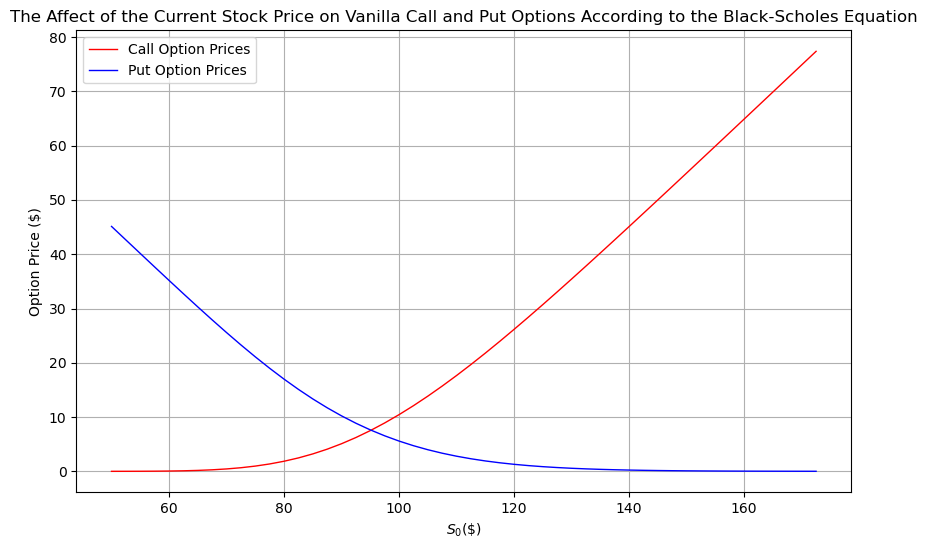

In [8]:
"""
Experimenting with the current stock price of the option (S_0).
"""
# Each of the input parameters are initialised to the values used by the example in the coursework spec
S = 100
E = 100
t = 0
T = 1 # Time to expiry is one year from today
sigma = 0.2 # 20% volatility
r = 0.05 # 5% risk free interest rate
D = 0 # 0% Dividend yield

# Pandas series to store the call and put option prices for each stock price S in (50, 175)
S_call_series = pd.Series([0]*50, index = np.arange(50, 175, 2.5))
S_put_series = pd.Series([0]*50, index = np.arange(50, 175, 2.5))

# Calculates the corresponding BSM call and put option price for each value of S
S_value = 50
for i in range(0, 50):
    # The d1 and d2 are dependent on the underlying and so have to be recalculated at each iteration
    d1 = (np.log(S_value / E) + ((r - D + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    d2 = (np.log(S_value / E) + ((r - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    # The index for the pandas series mirrors the values the underlying takes (and so it can be
    # used as an index)
    S_call_series[S_value] = BSM_European_Call(S_value, E, t, T, r, D, d1, d2)
    S_put_series[S_value] = BSM_European_Put(S_value, E, t, T, r, D, d1, d2)
    # Move up in increments of $2.50
    S_value += 2.5

plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(50, 175, 2.5), S_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(50, 175, 2.5), S_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('$S_0  (\$)$')
plt.ylabel('Option Price ($)')
plt.title('The Affect of the Current Stock Price on Vanilla Call and Put Options According'\
          ' to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

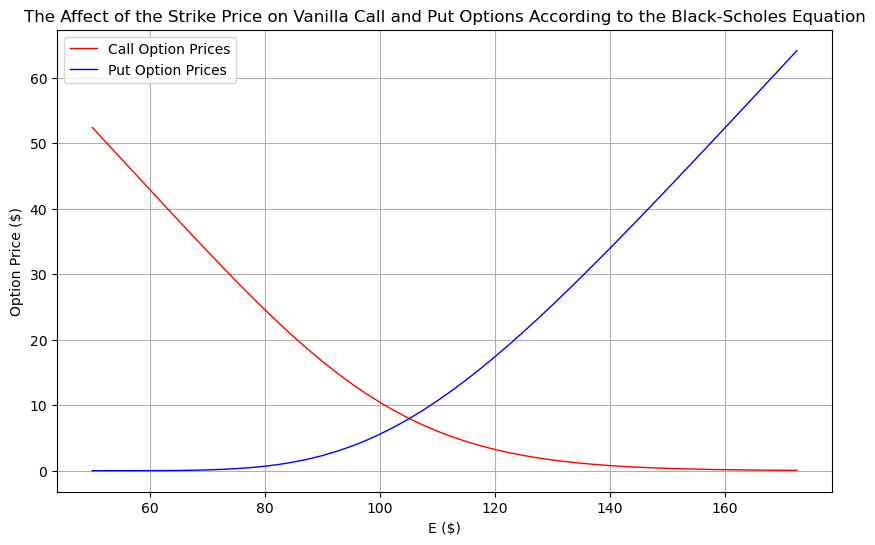

In [9]:
"""
Experimenting with the strike price of the option (E).
"""
# Pandas series to store the call and put option prices for each strike price E in (50, 175)
E_call_series = pd.Series([0]*50, index = np.arange(50, 175, 2.5))
E_put_series = pd.Series([0]*50, index = np.arange(50, 175, 2.5))

# Calculates the corresponding BSM call and put option price for each value of E
E_value = 50
for i in range(0, 50):
    # The d1 and d2 are dependent on the strike price and so have to be recalculated at each iteration
    d1 = (np.log(S / E_value) + ((r - D + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    d2 = (np.log(S / E_value) + ((r - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    # The index for the pandas series mirrors the values the strike price takes (and so it can be
    # used as an index)
    E_call_series[E_value] = BSM_European_Call(S, E_value, t, T, r, D, d1, d2)
    E_put_series[E_value] = BSM_European_Put(S, E_value, t, T, r, D, d1, d2)
    # Move up in increments of $2.50
    E_value += 2.5

plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(50, 175, 2.5), E_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(50, 175, 2.5), E_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('E ($)')
plt.ylabel('Option Price ($)')
plt.title('The Affect of the Strike Price on Vanilla Call and Put Options According'\
          ' to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

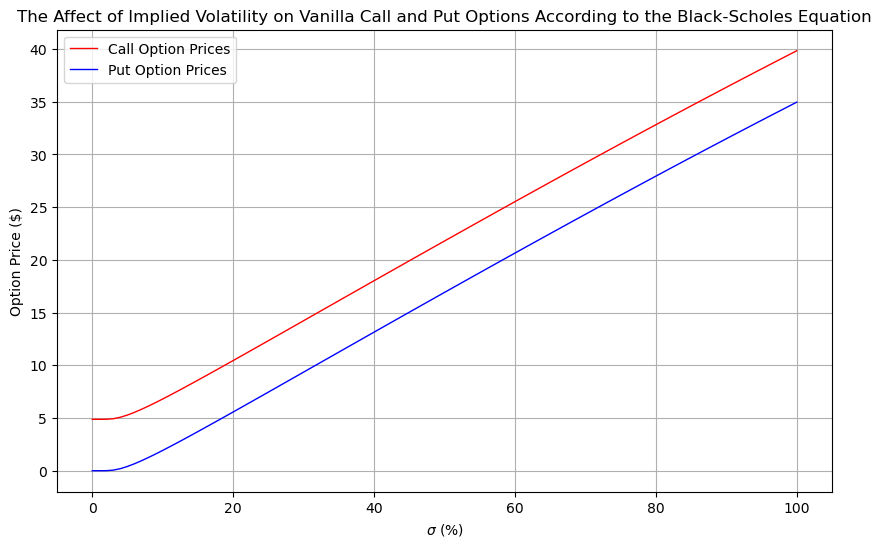

In [10]:
"""
Experimenting with the volatility of the option (sigma - a percent in decimal form).
"""
# Pandas series to store the call and put option prices for each volatility sigma in (0, 100)
sigma_call_series = pd.Series([0]*101, index = np.arange(0, 101, 1))
sigma_put_series = pd.Series([0]*101, index = np.arange(0, 101, 1))

# Sigma = 0 creates division by zero errors, so a near zero value is used instead
# Calculates the corresponding BSM call and put option price for each value of sigma
sigma_value = 1e-20
for i in range(0, 101):
    # The d1 and d2 are dependent on the volatility and so have to be recalculated at each iteration
    d1 = (np.log(S / E) + ((r - D + ((sigma_value**2)/ 2)) * (T - t))) / (sigma_value * np.sqrt(T - t))
    d2 = (np.log(S / E) + ((r - D - ((sigma_value**2)/ 2)) * (T - t))) / (sigma_value * np.sqrt(T - t))
    # Rounds the sigma value to 2dp after the first instance to prevent rounding errors impacting future values
    sigma_value = np.round(sigma_value, 2)
    sigma_call_series[i] = BSM_European_Call(S, E, t, T, r, D, d1, d2)
    sigma_put_series[i] = BSM_European_Put(S, E, t, T, r, D, d1, d2)
    # Move up in increments of 1%
    sigma_value += 0.01

plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(0, 101, 1), sigma_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(0, 101, 1), sigma_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('$\sigma$ $(\%)$')
plt.ylabel('Option Price ($)')
plt.title('The Affect of Implied Volatility on Vanilla Call and Put Options According'\
          ' to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

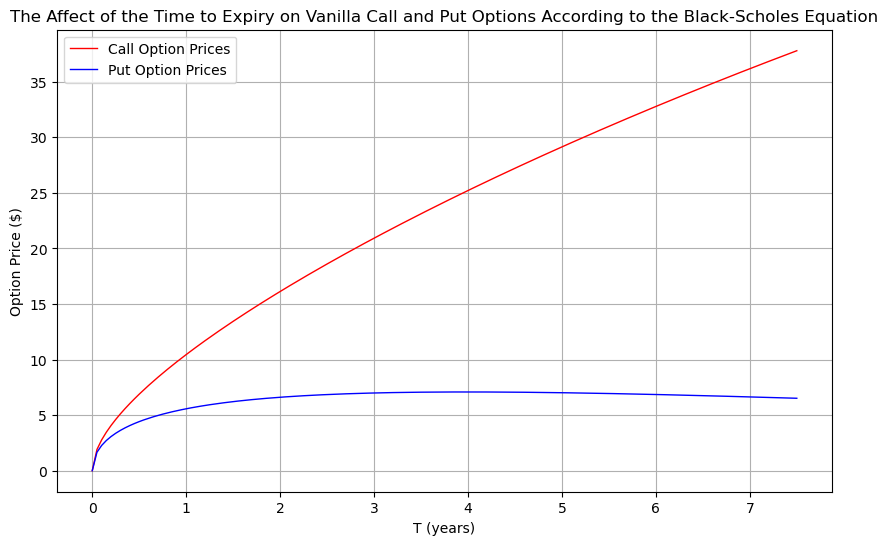

In [11]:
"""
Experimenting with the time to expiry of the option (T - in years).
"""
# Pandas series to store the call and put option prices for each Time to expiry T in (0, 7.5) - years
T_call_series = pd.Series([0]*151, index = np.arange(0, 7.55, 0.05))
T_put_series = pd.Series([0]*151, index = np.arange(0, 7.55, 0.05))

# T = 0 creates division by zero errors, so a near zero value is used instead
# Calculates the corresponding BSM call and put option price for each value of T
T_value = 1e-20
for i in range(0, 151):
    # The d1 and d2 are dependent on the time to expiry T and so have to be recalculated at each iteration
    d1 = (np.log(S / E) + ((r - D + ((sigma**2)/ 2)) * (T_value - t))) / (sigma * np.sqrt(T_value - t))
    d2 = (np.log(S / E) + ((r - D - ((sigma**2)/ 2)) * (T_value - t))) / (sigma * np.sqrt(T_value - t))
    # The index for the pandas series mirrors the values the time to expiry takes (the current index * 
    # the step size is equivalent to this)
    T_call_series[i * 0.05] = BSM_European_Call(S, E, t, T_value, r, D, d1, d2)
    T_put_series[i * 0.05] = BSM_European_Put(S, E, t, T_value, r, D, d1, d2)
    # Move up in increments of 1/20th of a year
    T_value += 0.05

plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(0, 7.55, 0.05), T_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(0, 7.55, 0.05), T_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('T (years)')
plt.ylabel('Option Price ($)')
plt.title('The Affect of the Time to Expiry on Vanilla Call and Put Options According'\
          ' to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

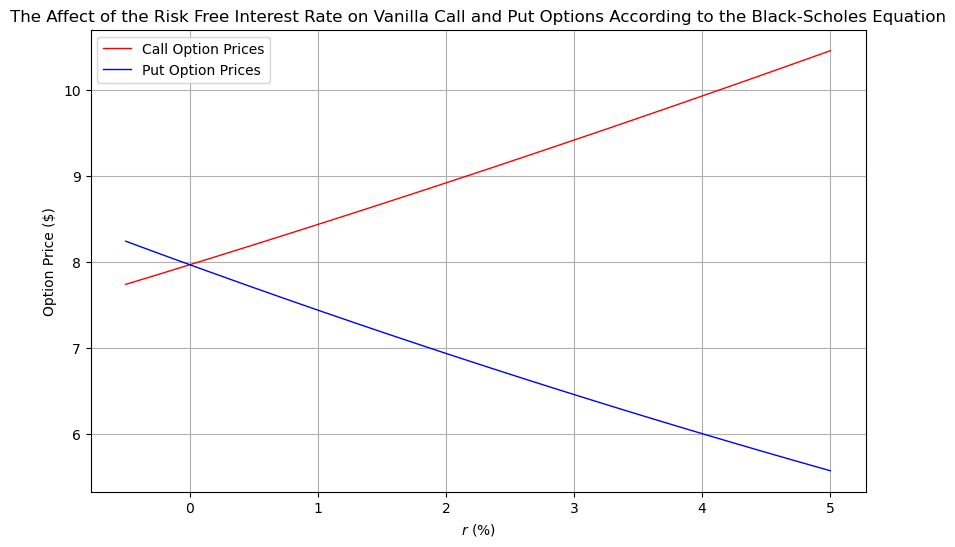

In [12]:
"""
Experimenting with the risk free interest rate (r - a percent in decimal form).
"""
# Due to starting with negative interest rates, there is a problem representing the index values
# So a self defined np.array is used
index_array = np.array([0.] * 56)
index_percent = -0.5

# Stores the percent equivalent of each r value to test against an indexable integer k
for k in range(0, 56):
    index_array[k] = np.round(index_percent, 2)
    index_percent += 0.1

# Pandas series to store the call and put option prices for each risk free interest rate
# in (-0.5, 5) - percent
r_call_series = pd.Series([0]*56, index = index_array)
r_put_series = pd.Series([0]*56, index = index_array)

# Calculates the corresponding BSM call and put option price for each value of r
r_value = -0.005
for i in range(0, 56):
    # The d1 and d2 are dependent on the interest rate r and so have to be recalculated at each iteration
    d1 = (np.log(S / E) + ((r_value - D + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    d2 = (np.log(S / E) + ((r_value - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    # The index for the pandas series mirrors the values the interest rate takes (a separate array
    # of values encompassing the same interval is used)
    r_call_series[index_array[i]] = BSM_European_Call(S, E, t, T, r_value, D, d1, d2)
    r_put_series[index_array[i]] = BSM_European_Put(S, E, t, T, r_value, D, d1, d2)
    # Move up in increments of 0.1% (decimal equivalent)
    r_value += 0.001
    
plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(-0.5, 5.1, 0.1), r_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(-0.5, 5.1, 0.1), r_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('$r$ (%)')
plt.ylabel('Option Price ($)')
plt.title('The Affect of the Risk Free Interest Rate on Vanilla Call and Put Options'\
          ' According to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

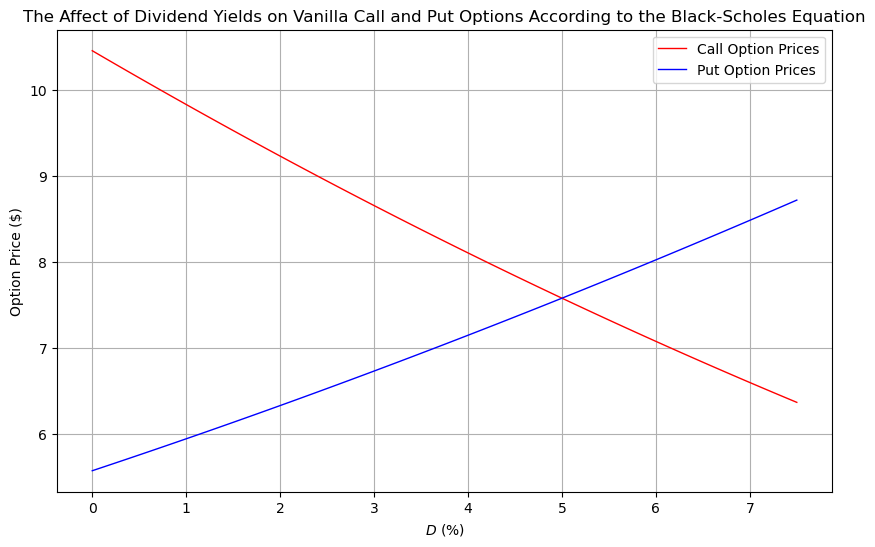

In [13]:
"""
Experimenting with the dividend yield (D - a percent in decimal form).
"""
# Pandas series to store the call and put option prices for each dividend yield D in (0, 7.5) - percent
D_call_series = pd.Series([0]*61, index = np.arange(0, 7.625, 0.125))
D_put_series = pd.Series([0]*61, index = np.arange(0, 7.625, 0.125))

D_value = 0
# Calculates the corresponding BSM call and put option price for each value of D
for i in range(0, 61):
    # The d1 and d2 are dependent on the dividend yield and so have to be recalculated at each iteration
    d1 = (np.log(S / E) + ((r - D_value + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    d2 = (np.log(S / E) + ((r - D_value - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    # The index for the pandas series mirrors the values the dividend yield takes (the current index * 
    # the step size is equivalent to this)
    D_call_series[i * 0.125] = BSM_European_Call(S, E, t, T, r, D_value, d1, d2)
    D_put_series[i * 0.125] = BSM_European_Put(S, E, t, T, r, D_value, d1, d2)
    # Move up in increments of 0.125%
    D_value += 0.00125

plt.figure(figsize=(10,6))
# Plots our call option experiment results in blue
plt.plot(np.arange(0, 7.625, 0.125), D_call_series, 'r-', label='Call Option Prices', linewidth=1)
plt.plot(np.arange(0, 7.625, 0.125), D_put_series, 'b-', label='Put Option Prices', linewidth=1)
# Plots the put option experiment results in red
plt.xlabel('$D$ (%)')
plt.ylabel('Option Price ($)')
plt.title('The Affect of Dividend Yields on Vanilla Call and Put Options According'\
          ' to the Black-Scholes Equation')
plt.grid(True)
plt.legend()
plt.show()

<h2>Task 3: Plotting Option Prices</h2>
<p>Four graphs are presented, one for each of the four option types outlined in Task 2, each graph contains a plot of the price of the option, $V(S)$, against a varying underlying price, $S_0$, for some fixed time prior to expiry ($t < T$). Each plot also contains the corresponding payoff function for the option (when $t = T$).</p>
<p>The payoff function gives us the maximum expected return from an option with stock price S (this is the price at expiry $\rightarrow t = T$) and strike price K. This is given by Payoff(S) = max(S - E, 0)</p>
<p>The payoff function for each of the relevant option prices is given below: </p>
<blockquote>For a European Call Option: Payoff$(S) =$ max$(S - E, 0)$</blockquote>
<blockquote>For a European Put Option: Payoff$(S) =$ max$(E - S, 0)$</blockquote>
<blockquote>For a Binary Call Option: Payoff$(S) = H(S - E)$</blockquote>
<blockquote>For a Binary Put Option: Payoff$(S) = H(E - S)$</blockquote>

<p>The relevant graphs and code for European and Binary style options are placed into separate cells to make their content easier to digest and to prevent you from having to scroll through the graphs to view them.</p>

<p>For consistency's sake, each of the examples below use the same parameters that were used in the example shown in the coursework specification, each plot also uses the same interval for the varying stock price, S, as in the plots in the relevant lecture (0, 300). </p>

<h3>Supplementary Explanation</h3>
<p>For the European style options, the plots in both graphs are visually similar (and indeed numerically the results are also similar), with the only difference being the smooth increase/ decrease as the stock price approaches the strike price and the slight gap between the payoff and option price before/ after the stock price reaches the strike price. The former is due to the 'diffusion operator' in the Black Scholes equation, while the latter is due to the present valuing of the stock (the $-rv$ part of the BSM equation) - this prices the put slightly lower and the call slightly higher than the respective payoff function.</p>

<p>For the Binary style options both graphs are slightly different, with the graphs for option price representing a sigmoid'ish' function and the Heaviside function representing the payoff. Between both plots on either graph, the following differences abound:</p>
<ol>
    <li>The gap between the Heaviside function before/ after the stock price approaches the strike price is due to the present valuing of the stock ($-rv$).</li>
    <li>The smooth curves before and after the stock price approaches the strike price is due to the diffusion portion of the BSM equation ($\frac{1}{2}\sigma^2S^2\frac{d^2v}{ds^2}$).</li>
    <li>The drift/ deviation of the line from the straight line found in the Heaviside function is due to the drift portion of the BSM equation ($rS\frac{dv}{dS}$).</li>
</ol>

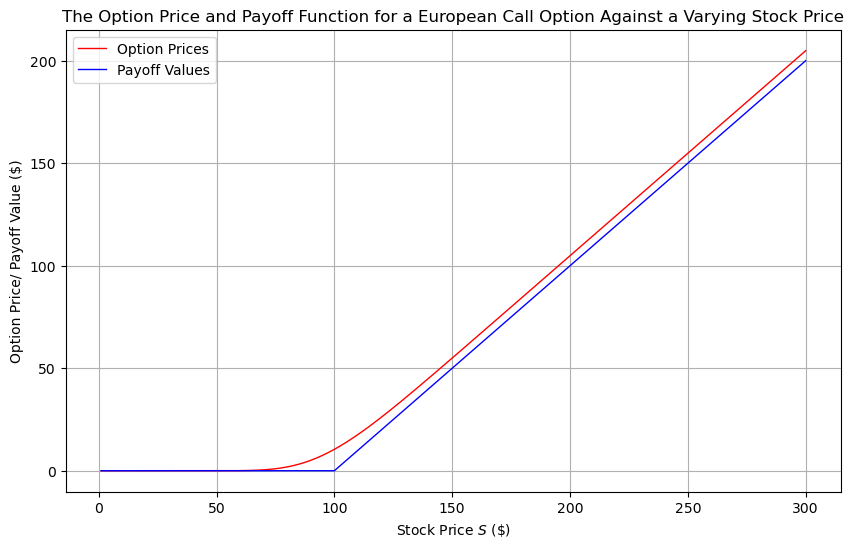

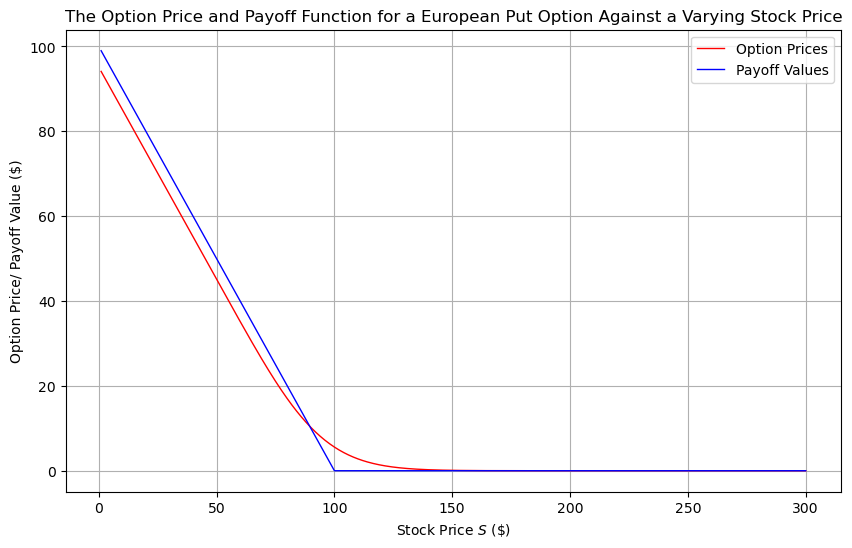

In [14]:
"""
Calculates the option price and payoff function for each of the four option styles mentioned in
Task 2, for a varying stock price S_0. The required graph for both European style options is then plotted.
"""
# Pandas series to store the BSM European call price and payoff function values
euro_call_price = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))
euro_call_payoff = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))

# Pandas series to store the BSM European put price and payoff function values
euro_put_price = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))
euro_put_payoff = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))

# Pandas series to store the BSM Binary call price and payoff function values
binary_call_price = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))
binary_call_payoff = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))

# Pandas series to store the BSM Binary put price and payoff function values
binary_put_price = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))
binary_put_payoff = pd.Series([0]*599, index = np.arange(1, 300.5, 0.5))

# Calculates the price and payoff function values for each value of S (for each option type)
S_0 = 1
# Skips S_0 = 0 as it creates a log division by zero error (has no impact on the resulting graph)
for i in range(1, 600):
    # Computes the d1 and d2 to be used by the relevant BSM calculator function for the option price
    d1_euro_price = (np.log(S_0 / E) + ((r - D + ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    d2_euro_price = (np.log(S_0 / E) + ((r - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    
    # Computes the d1 and d2 to be used by the relevant BSM calculator function for the payoff (t = T)
    # To prevent a division by zero error from occuring a sufficiently small number is substituted
    # into the denominator of the d1 and d2 used for the payoff
    d1_euro_payoff = (np.log(S_0 / E) + ((r - D + ((sigma**2)/ 2)) * (T - T))) / (sigma * np.sqrt(1e-20))
    d2_euro_payoff = (np.log(S_0 / E) + ((r - D - ((sigma**2)/ 2)) * (T - T))) / (sigma * np.sqrt(1e-20))
    
    # Computes the d2 to be used by both the relevant binary BSM calculator function for the option price
    d2_binary_price = (np.log(S_0 / E) + ((r - D - ((sigma**2)/ 2)) * (T - t))) / (sigma * np.sqrt(T - t))
    
    # Computes the d2 to be used by each binary payoff function (t = T)
    d2_binary_payoff = (np.log(S_0 / E) + ((r - D - ((sigma**2)/ 2)) * (T - T))) / (sigma * np.sqrt(1e-20))
    
    # Calculates and stores the European call option price and payoff value
    euro_call_price[S_0] = BSM_European_Call(S_0, E, t, T, r, D, d1_euro_price, d2_euro_price)
    euro_call_payoff[S_0] = BSM_European_Call(S_0, E, T, T, r, D, d1_euro_payoff, d2_euro_payoff)
    
    # Calculates and stores the European put option price and payoff value
    euro_put_price[S_0] = BSM_European_Put(S_0, E, t, T, r, D, d1_euro_price, d2_euro_price)
    euro_put_payoff[S_0] = BSM_European_Put(S_0, E, T, T, r, D, d1_euro_payoff, d2_euro_payoff)
    
    # Calculates and stores the Binary call option price and payoff value
    binary_call_price[S_0] = BSM_Binary_Call(r, t, T, d2_binary_price)
    binary_call_payoff[S_0] = BSM_Binary_Call(r, T, T, d2_binary_payoff)
    
    # Calculates and stores the Binary put option price and payoff value
    binary_put_price[S_0] = BSM_Binary_Put(r, t, T, d2_binary_price)
    binary_put_payoff[S_0] = BSM_Binary_Put(r, T, T, d2_binary_payoff)
    # Move up in increments of $0.50
    S_0 += 0.5
    
# PLOT 1 - The price and payoff plots for a European call option with varying stock price S_0
plt.figure(figsize=(10,6))
# Plots the call option prices in blue
plt.plot(np.arange(1, 300.5, 0.5), euro_call_price, 'r-', label='Option Prices', linewidth=1)
plt.plot(np.arange(1, 300.5, 0.5), euro_call_payoff, 'b-', label='Payoff Values', linewidth=1)
# Plots the payoff values in red
plt.xlabel('Stock Price $S$ (\$)')
plt.ylabel('Option Price/ Payoff Value (\$)')
plt.title('The Option Price and Payoff Function for a European Call Option Against a Varying Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# PLOT 2 - The price and payoff graph for a European put option with varying stock price S_0
plt.figure(figsize=(10,6))
# Plots the put option prices in blue
plt.plot(np.arange(1, 300.5, 0.5), euro_put_price, 'r-', label='Option Prices', linewidth=1)
plt.plot(np.arange(1, 300.5, 0.5), euro_put_payoff, 'b-', label='Payoff Values', linewidth=1)
# Plots the payoff values in red
plt.xlabel('Stock Price $S$ (\$)')
plt.ylabel('Option Price/ Payoff Value (\$)')
plt.title('The Option Price and Payoff Function for a European Put Option Against a Varying Stock Price')
plt.grid(True)
plt.legend()
plt.show()

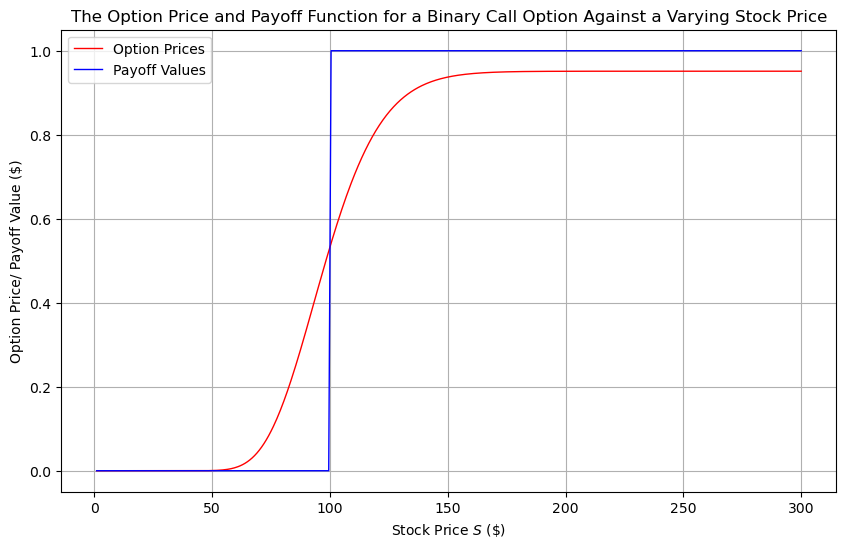

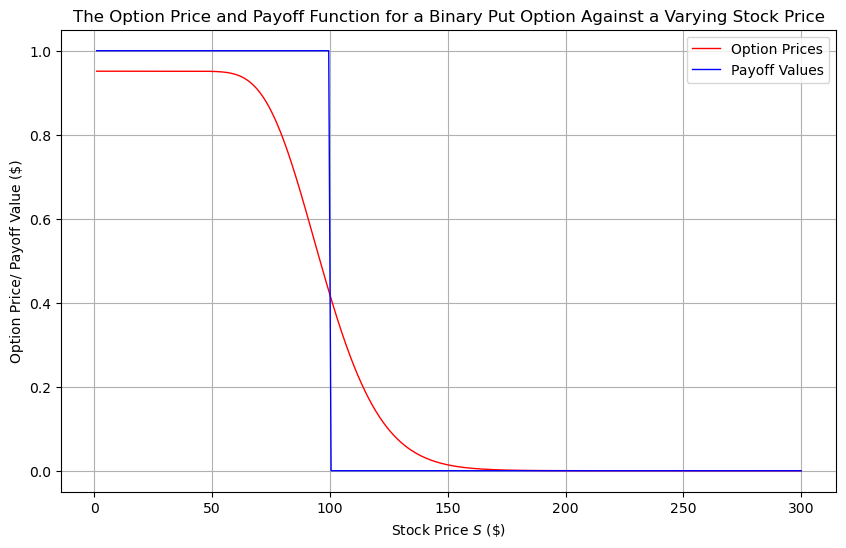

In [16]:
"""
The required graph for both of the Binary style options is plotted.
"""
# PLOT 3 - The price and payoff graph for a binary call option with varying stock price S_0
plt.figure(figsize=(10,6))
# Plots the binary call option prices in blue
plt.plot(np.arange(1, 300.5, 0.5), binary_call_price, 'r-', label='Option Prices', linewidth=1)
plt.plot(np.arange(1, 300.5, 0.5), binary_call_payoff, 'b-', label='Payoff Values', linewidth=1)
# Plots the binary call payoff values in red
plt.xlabel('Stock Price $S$ (\$)')
plt.ylabel('Option Price/ Payoff Value (\$)')
plt.title('The Option Price and Payoff Function for a Binary Call Option Against a Varying Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# PLOT 4 - The price and payoff graph for a binary put option with varying stock price S_0
plt.figure(figsize=(10,6))
# Plots the binary put option prices in blue
plt.plot(np.arange(1, 300.5, 0.5), binary_put_price, 'r-', label='Option Prices', linewidth=1)
plt.plot(np.arange(1, 300.5, 0.5), binary_put_payoff, 'b-', label='Payoff Values', linewidth=1)
# Plots the binary put payoff values in red
plt.xlabel('Stock Price $S$ (\$)')
plt.ylabel('Option Price/ Payoff Value (\$)')
plt.title('The Option Price and Payoff Function for a Binary Put Option Against a Varying Stock Price')
plt.grid(True)
plt.legend()
plt.show()

<h2>References</h2>
<blockquote> [1] Forbes, "Dividend Yields", 2024. [Online]. Available: https://www.forbes.com/uk/advisor/investing/what-is-dividend-yield/#how_much_do_companies_pay_in_dividends</blockquote>
<blockquote>The material used to aid my discussion in Task 2: https://keats.kcl.ac.uk/mod/resource/view.php?id=8484633, all credit goes to Riaz Ahmad.</blockquote>
<blockquote>The material used to aid my quantitative understanding across all three tasks: https://keats.kcl.ac.uk/mod/folder/view.php?id=8523803, all credit goes to Riaz Ahmad.</blockquote>
<blockquote>All the Numpy documentation used to aid my answers can be found at https://numpy.org/doc/stable/reference/index.html</blockquote>
<blockquote>All MatPlotLib documentation used to aid my answers can be found at https://matplotlib.org/stable/api/pyplot_summary.html</blockquote>